(c) Juan Gomez 2020. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# Taller 1: Visualización y análisis de una solución de teoría de la eslasticidad usando interpolación sobre una malla por elementos finitos


### Contenido

* Creación de una malla simple en **gmsh**.

* Conversión de la malla a archivos de texto usando funciones de **SolidsPy**.

* Visualización de la solución usando funciones de **SolidsPy**.

* Preguntas sugeridas para el análisis.

### Problema

Determinar el campo de tensiones principales para la presa rectangular mostrada en la figura y sometida al empuje de un fluido de peso especifíco $\gamma$

<center><img src="img/dam.png" alt="files" style="width:500px"></center>


Se sabe que el campo de tensiones esta dado por:

$$\sigma_{yy}= \gamma(H-y)-2\gamma x$$

$$\sigma_{xx}=-\gamma(H-y)$$

$$\tau_{xy}=-\gamma x$$


### Modulos

Para la solución se utilizarán los siguientes modulos:

* Numpy.
* Pre-procesador de SolidsPy.
* Post-procesadr de SolidsPy.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import solidspy.preprocesor as msh
import solidspy.postprocesor as pos

### Función solución

En esta rutina se programa la solución por teoría de la elasticidad para la presa y se evaluan las tensiones principales en términos del centro y radio del círculo de Mohr.

In [3]:
def principal_stress_field(x, y, gamma , H):
    # Stress field
    S_yy =  gamma*(H - y)-2*gamma*x
    S_xx = -gamma*(H - y)
    T_xy = -gamma*x
    
    #Principal stresses
    sig_c = (S_xx+S_yy)/2
    R = np.sqrt(((S_xx-S_yy)/2)**2 + T_xy**2)
    sig_p = sig_c + R
    sig_m = sig_c - R
    return S_xx, S_yy , T_xy , sig_p , sig_m , R 

### Código principal

En este código:

* Se cargan los archivos de nudos y elementos (para generar estos archivos a partir de la malla en gmsh se debe ejecutar el script **taller1.py**).

* Se extraen las coordenadas de los nudos del arreglo nodes.

* Se evalúa la solución en cada punto y se almacena en el arreglo solución.

* Una vez se termina la evaluación se usa la función de visualización.

In [4]:
nodes    = np.loadtxt('files/'+'nodes.txt', ndmin=2)
elements = np.loadtxt('files/'+'eles.txt', ndmin=2, dtype=np.int)

In [5]:
nn = nodes.shape[0]
x = nodes[:, 1]
y = nodes[:, 2]
SOL = np.zeros([nn, 6])

In [6]:
gamma = 9.8
H = 100.0
S_xx, S_yy, T_xy, sig_p, sig_m, r = principal_stress_field(x, y, gamma, H)

La función `plot_node_field()` invoca 2 funciones adicionales. `mesh2tri()`, la cual genera un objeto `triangulation` en Python (Consultar en https://matplotlib.org/3.2.0/api/tri_api.html) sobre el cual realiza la interpolación; y 
posterior visualización de la solución.

<IPython.core.display.Javascript object>


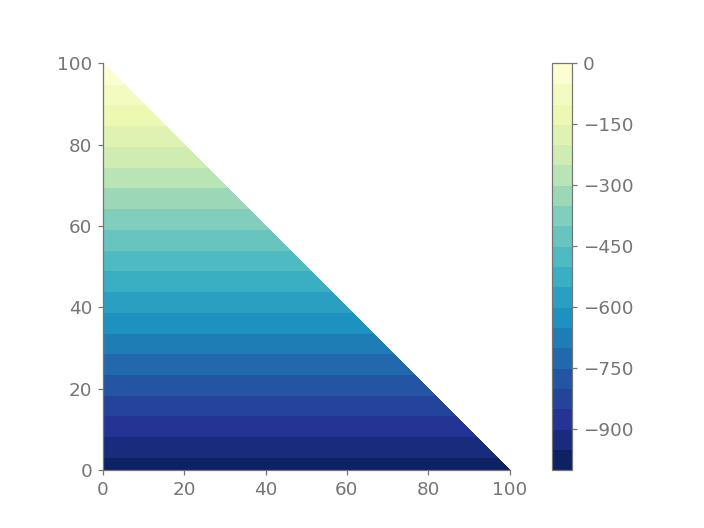

C:\Users\AX201 GMRS\Anaconda3\lib\site-packages\solidspy\postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


<IPython.core.display.Javascript object>


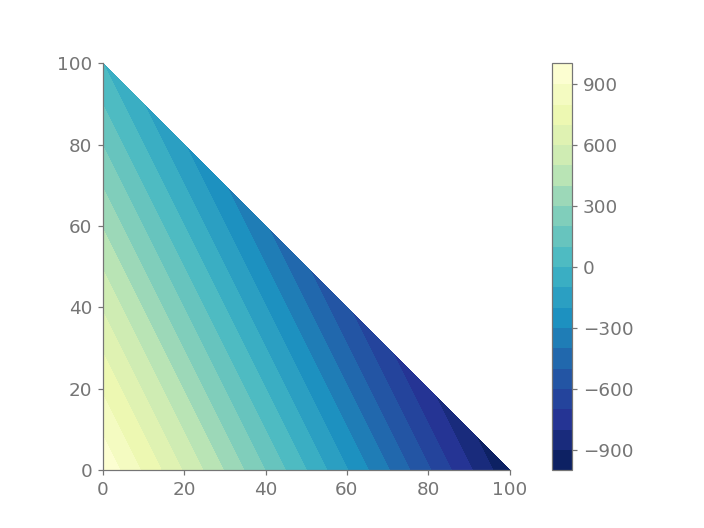

<IPython.core.display.Javascript object>


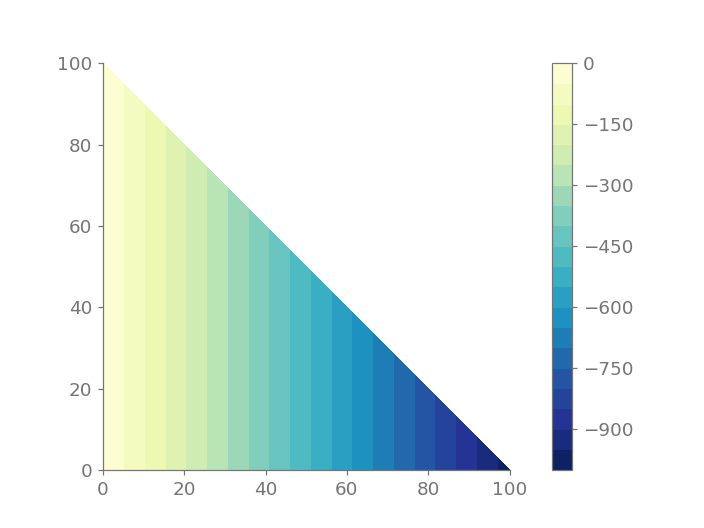

In [7]:
pos.plot_node_field(S_xx, nodes, elements , levels =20)
pos.plot_node_field(S_yy, nodes, elements , levels =20)
pos.plot_node_field(T_xy, nodes, elements , levels =20)

<IPython.core.display.Javascript object>


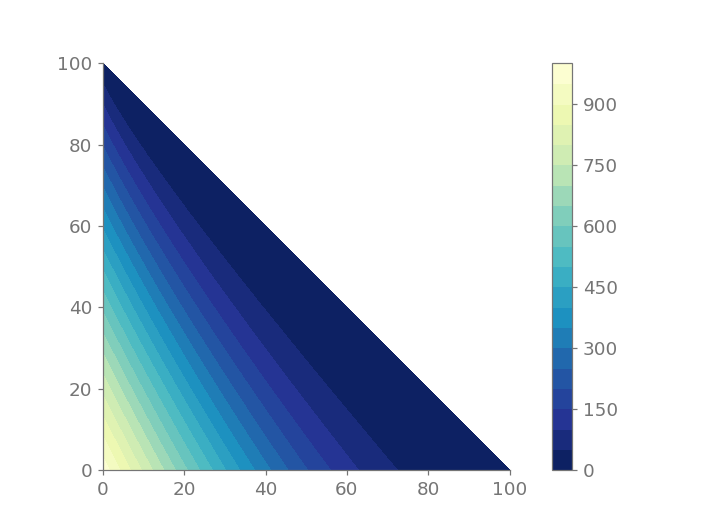

<IPython.core.display.Javascript object>


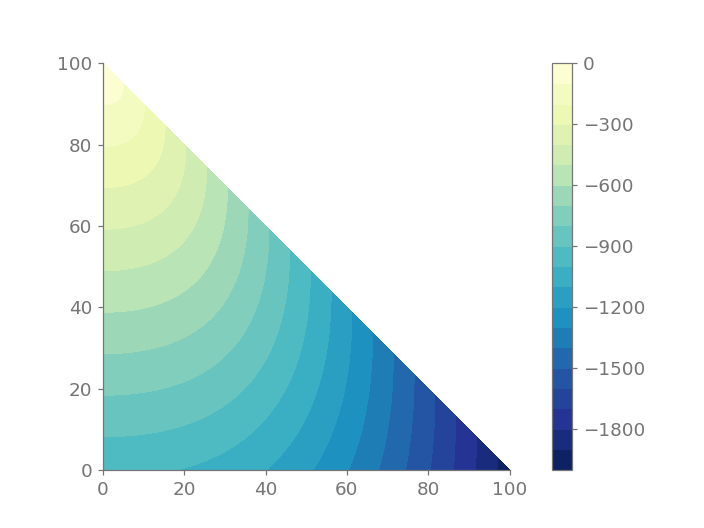

<IPython.core.display.Javascript object>


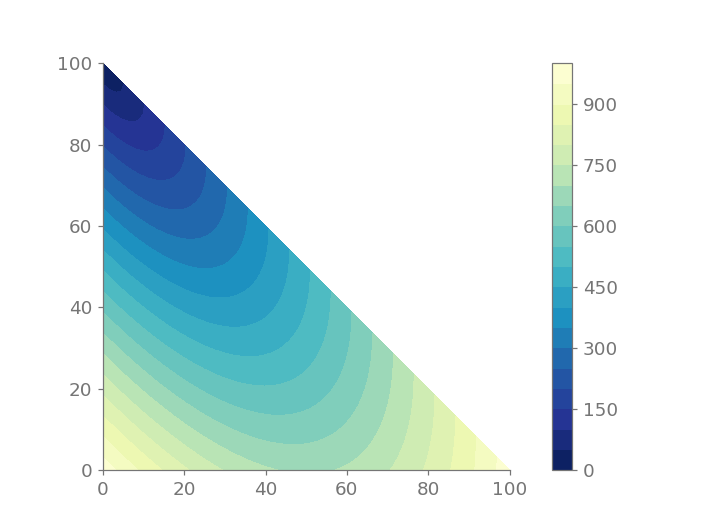

In [8]:
pos.plot_node_field(sig_p, nodes, elements , levels =20)
pos.plot_node_field(sig_m, nodes, elements , levels =20)
pos.plot_node_field(r, nodes, elements , levels =20)

### Preguntas propuestas.

- **1)** Usando 3 mallas diferentes (una muy gruesa, una mediana y una muy refinada) comente sobre los resultados visuales para cada una.

- **2)** Usando las visualizaciones obtenidas para la malla mas fina del caso anterior realizar las siguientes actividades:

    * Verifique las condiciones de frontera de tracciones sobre todas las caras de la presa (presente su solución graficamente).

    * Usando las condiciones de frontera identificadas en el paso anterior que la presa este en equilibrio.
    
    * Considerando las tensiones a flexión (en este caso $\sigma_{yy}$) identifique la localización del eje neutro (entregue su solución graficamente).
    
    * Realice un corte con una sección transversal perpendicular al eje neutro y sobre esta grafique la distribución del vector de tracciones.
    
    * Identifique los valotes máximos y las localizaciones de:
    
        * Esfuerzo a tracción.
        * Esfuerzo a compresión.
        * Esfuerzo cortante.
        
    * Suponiendo que la resistencia a la tracción del material del que se va a construir la presa es $\sigma = 500 KPa$ identifque la presa de altura máxima posible.